# AI Impact on Jobs & Economy: Exploratory Data Analysis
## 2025 AI Index Report Data

This notebook provides a comprehensive visual analysis of AI's impact on employment, investment, and industrial automation.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Data path
data_path = Path('/Users/matthewgrossman/Desktop/PUBLIC DATA_ 2025 AI Index Report/4. Economy/Data')

print("Data folder contents:")
print([f.name for f in sorted(data_path.glob('*.csv'))])

Data folder contents:
['fig_4.2.1.csv', 'fig_4.2.10.csv', 'fig_4.2.11.csv', 'fig_4.2.12.csv', 'fig_4.2.13.csv', 'fig_4.2.14.csv', 'fig_4.2.15.csv', 'fig_4.2.16.csv', 'fig_4.2.17.csv', 'fig_4.2.18.csv', 'fig_4.2.19.csv', 'fig_4.2.2.csv', 'fig_4.2.20.csv', 'fig_4.2.21.csv', 'fig_4.2.22.csv', 'fig_4.2.23.csv', 'fig_4.2.24.csv', 'fig_4.2.25.csv', 'fig_4.2.27.csv', 'fig_4.2.3.csv', 'fig_4.2.4.csv', 'fig_4.2.5.csv', 'fig_4.2.6.csv', 'fig_4.2.7.csv', 'fig_4.2.8.csv', 'fig_4.2.9.csv', 'fig_4.3.1.csv', 'fig_4.3.10.csv', 'fig_4.3.11.csv', 'fig_4.3.12.csv', 'fig_4.3.13.csv', 'fig_4.3.14.csv', 'fig_4.3.15.csv', 'fig_4.3.16.csv', 'fig_4.3.2.csv', 'fig_4.3.3.csv', 'fig_4.3.4.csv', 'fig_4.3.5.csv', 'fig_4.3.6.csv', 'fig_4.3.8.csv', 'fig_4.3.9.csv', 'fig_4.4.1.csv', 'fig_4.4.11.csv', 'fig_4.4.12.csv', 'fig_4.4.13.csv', 'fig_4.4.2.csv', 'fig_4.4.3.csv', 'fig_4.4.4.csv', 'fig_4.4.5.csv', 'fig_4.4.6.csv', 'fig_4.4.7.csv', 'fig_4.4.9.csv', 'fig_4.5.1.csv', 'fig_4.5.2.csv', 'fig_4.5.3.csv', 'fig_4.5.4.csv'

## 1. AI Job Postings Analysis

In [19]:
# Load AI job postings data
jobs_df = pd.read_csv(data_path / 'fig_4.2.1.csv')

# Clean data - convert percentage strings to floats
jobs_df['AI job postings (% of all job postings)'] = jobs_df['AI job postings (% of all job postings)'].str.rstrip('%').astype('float')

# Remove rows with NaN values
jobs_df_clean = jobs_df.dropna(subset=['AI job postings (% of all job postings)'])
jobs_df_clean = jobs_df_clean.rename(columns={'AI job postings (% of all job postings)': 'AI_job_pct'})

print("Jobs Data Summary:")
print(f"Countries: {jobs_df_clean['Geographic area'].unique()}")
print(f"Years: {sorted(jobs_df_clean['Year'].unique())}")
print(f"\nData shape: {jobs_df_clean.shape}")
print(f"\nTop countries by latest year AI job percentage:")
latest_year = jobs_df_clean['Year'].max()
print(jobs_df_clean[jobs_df_clean['Year'] == latest_year].sort_values('AI_job_pct', ascending=False)[['Geographic area', 'AI_job_pct']])

Jobs Data Summary:
Countries: ['Netherlands' 'United Kingdom' 'Sweden' 'Belgium' 'Switzerland' 'Canada'
 'United Arab Emirates' 'United States' 'Hong Kong' 'Luxembourg'
 'Singapore']
Years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

Data shape: (72, 3)

Top countries by latest year AI job percentage:
          Geographic area  AI_job_pct
120             Singapore        3.27
109            Luxembourg        1.99
98              Hong Kong        1.89
87          United States        1.79
76   United Arab Emirates        1.72
65                 Canada        1.41
54            Switzerland        1.37
32                 Sweden        1.31
43                Belgium        1.31
21         United Kingdom        1.26
10            Netherlands        1.25


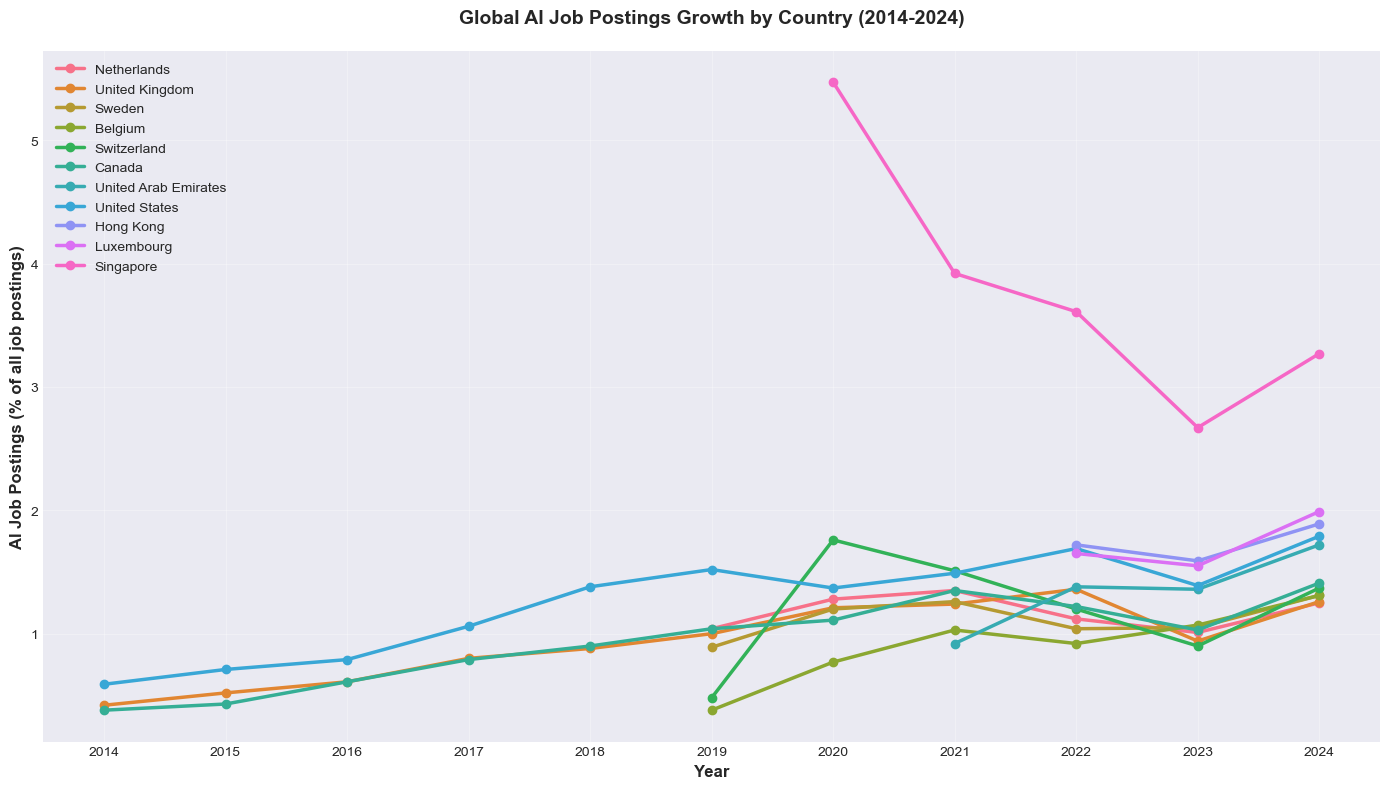

Key Insight: Singapore shows the highest percentage initially but has stabilized,
while Luxembourg shows rapid growth in recent years.


In [20]:
# Visualization 1: AI Job Postings Trend by Country
fig, ax = plt.subplots(figsize=(14, 8))

countries = jobs_df_clean['Geographic area'].unique()
colors = sns.color_palette("husl", len(countries))

for country, color in zip(countries, colors):
    country_data = jobs_df_clean[jobs_df_clean['Geographic area'] == country].sort_values('Year')
    ax.plot(country_data['Year'], country_data['AI_job_pct'], 
           marker='o', linewidth=2.5, markersize=6, label=country, color=color)

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('AI Job Postings (% of all job postings)', fontsize=12, fontweight='bold')
ax.set_title('Global AI Job Postings Growth by Country (2014-2024)', 
            fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', framealpha=0.9, fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xticks(jobs_df_clean['Year'].unique())
plt.tight_layout()
plt.show()

print("Key Insight: Singapore shows the highest percentage initially but has stabilized,")
print("while Luxembourg shows rapid growth in recent years.")

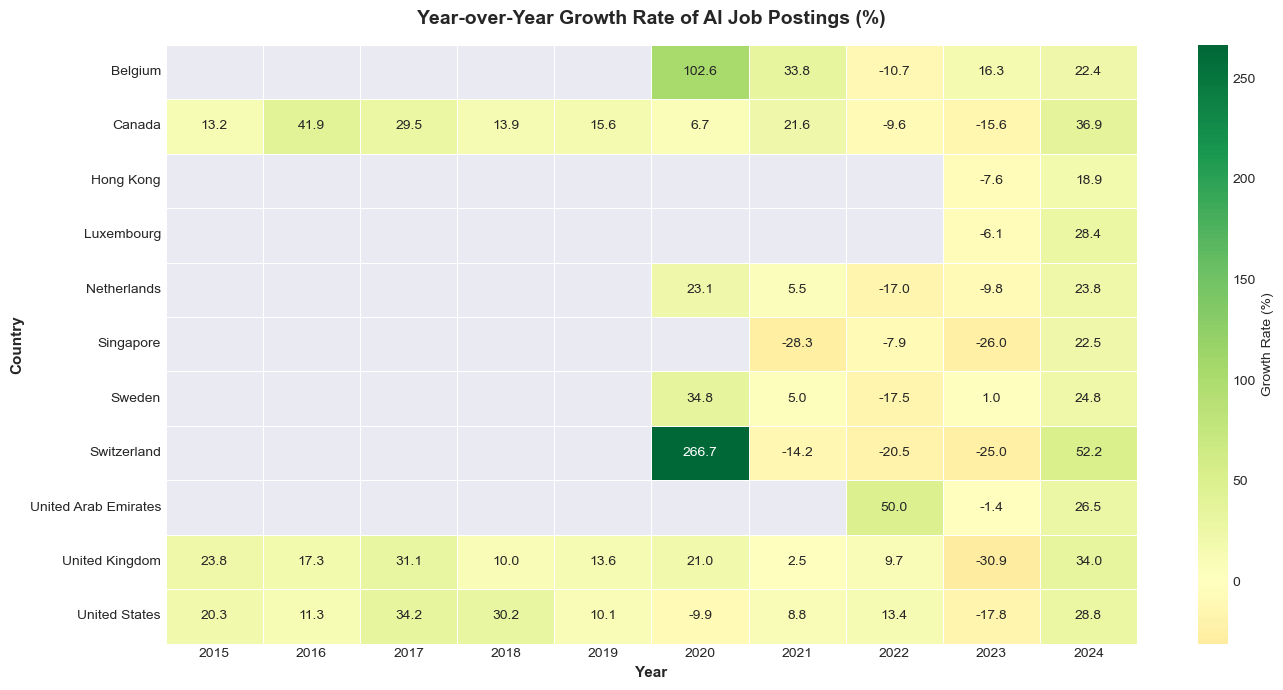

In [21]:
# Visualization 2: Year-over-Year Growth Rate
fig, ax = plt.subplots(figsize=(14, 7))

# Calculate growth rate for each country
growth_data = []
for country in countries:
    country_data = jobs_df_clean[jobs_df_clean['Geographic area'] == country].sort_values('Year')
    if len(country_data) > 1:
        pct_change = country_data['AI_job_pct'].pct_change() * 100
        country_data_growth = country_data.copy()
        country_data_growth['Growth_rate'] = pct_change
        growth_data.append(country_data_growth)

growth_df = pd.concat(growth_data, ignore_index=True).dropna(subset=['Growth_rate'])

# Heatmap of growth rates
growth_pivot = growth_df.pivot_table(values='Growth_rate', index='Geographic area', columns='Year')
sns.heatmap(growth_pivot, annot=True, fmt='.1f', cmap='RdYlGn', center=0, 
            cbar_kws={'label': 'Growth Rate (%)'}, ax=ax, linewidths=0.5)

ax.set_title('Year-over-Year Growth Rate of AI Job Postings (%)', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Year', fontsize=11, fontweight='bold')
ax.set_ylabel('Country', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

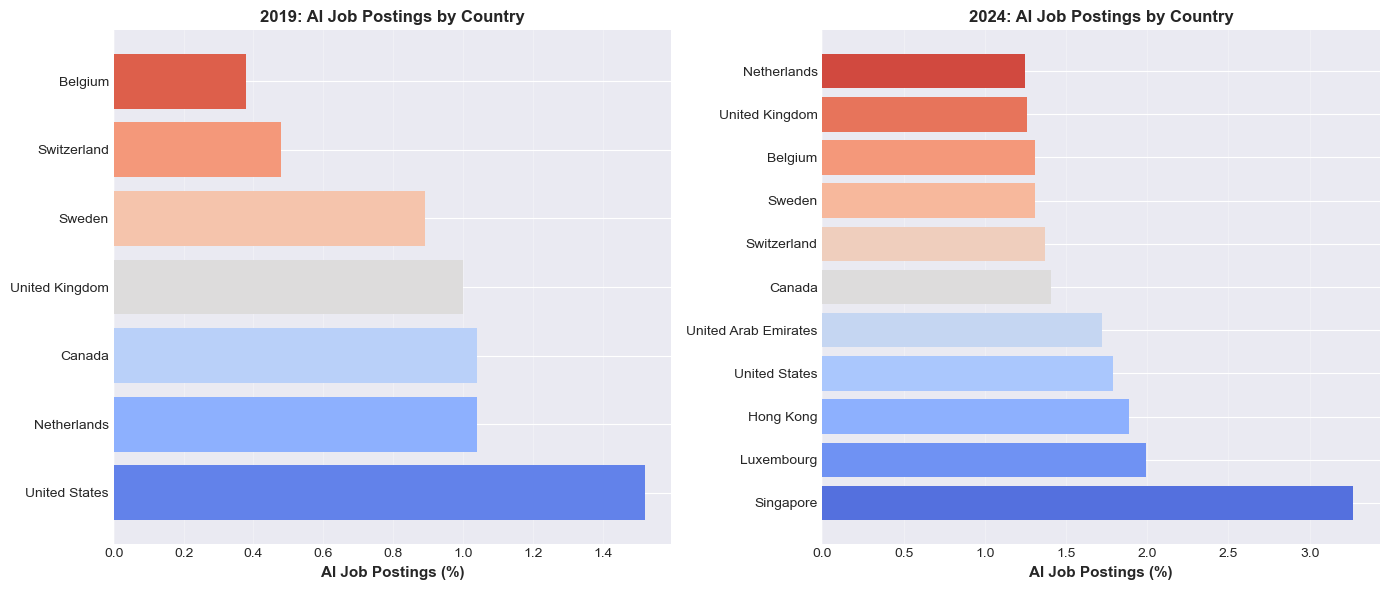


2019 to 2024 Growth Analysis:
  Geographic area  AI_job_pct_2019  AI_job_pct_2024  Absolute_increase  \
6         Belgium             0.38             1.31               0.93   
5     Switzerland             0.48             1.37               0.89   
4          Sweden             0.89             1.31               0.42   
2          Canada             1.04             1.41               0.37   
0   United States             1.52             1.79               0.27   
3  United Kingdom             1.00             1.26               0.26   
1     Netherlands             1.04             1.25               0.21   

   Pct_increase  
6    244.736842  
5    185.416667  
4     47.191011  
2     35.576923  
0     17.763158  
3     26.000000  
1     20.192308  


In [22]:
# Visualization 3: Distribution comparison - 2019 vs 2024
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

data_2019 = jobs_df_clean[jobs_df_clean['Year'] == 2019].sort_values('AI_job_pct', ascending=False)
data_2024 = jobs_df_clean[jobs_df_clean['Year'] == 2024].sort_values('AI_job_pct', ascending=False)

# 2019 barplot
colors_2019 = sns.color_palette("coolwarm", len(data_2019))
ax1.barh(data_2019['Geographic area'], data_2019['AI_job_pct'], color=colors_2019)
ax1.set_xlabel('AI Job Postings (%)', fontsize=11, fontweight='bold')
ax1.set_title('2019: AI Job Postings by Country', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# 2024 barplot
colors_2024 = sns.color_palette("coolwarm", len(data_2024))
ax2.barh(data_2024['Geographic area'], data_2024['AI_job_pct'], color=colors_2024)
ax2.set_xlabel('AI Job Postings (%)', fontsize=11, fontweight='bold')
ax2.set_title('2024: AI Job Postings by Country', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate growth from 2019 to 2024
growth_comparison = pd.merge(
    data_2019[['Geographic area', 'AI_job_pct']].rename(columns={'AI_job_pct': 'AI_job_pct_2019'}),
    data_2024[['Geographic area', 'AI_job_pct']].rename(columns={'AI_job_pct': 'AI_job_pct_2024'}),
    on='Geographic area'
)
growth_comparison['Absolute_increase'] = growth_comparison['AI_job_pct_2024'] - growth_comparison['AI_job_pct_2019']
growth_comparison['Pct_increase'] = (growth_comparison['Absolute_increase'] / growth_comparison['AI_job_pct_2019'] * 100)

print("\n2019 to 2024 Growth Analysis:")
print(growth_comparison.sort_values('Absolute_increase', ascending=False))

## 2. AI Investment Trends

In [23]:
# Load investment data
investment_df = pd.read_csv(data_path / 'fig_4.3.1.csv')

print("Investment Data Summary:")
print(investment_df.head(20))
print(f"\nTotal investment types: {investment_df['Investment Type'].unique()}")
print(f"Years: {sorted(investment_df['Year'].unique())}")

Investment Data Summary:
    Year     Investment Type  Total investment (in billions of US dollars)
0   2013  Merger/Acquisition                                          5.92
1   2013      Minority Stake                                          1.93
2   2013  Private Investment                                          5.17
3   2013     Public Offering                                          1.55
4   2014  Merger/Acquisition                                          6.69
5   2014      Minority Stake                                          0.34
6   2014  Private Investment                                          9.56
7   2014     Public Offering                                          2.45
8   2015  Merger/Acquisition                                          8.85
9   2015      Minority Stake                                          1.18
10  2015  Private Investment                                         13.35
11  2015     Public Offering                                          2.05


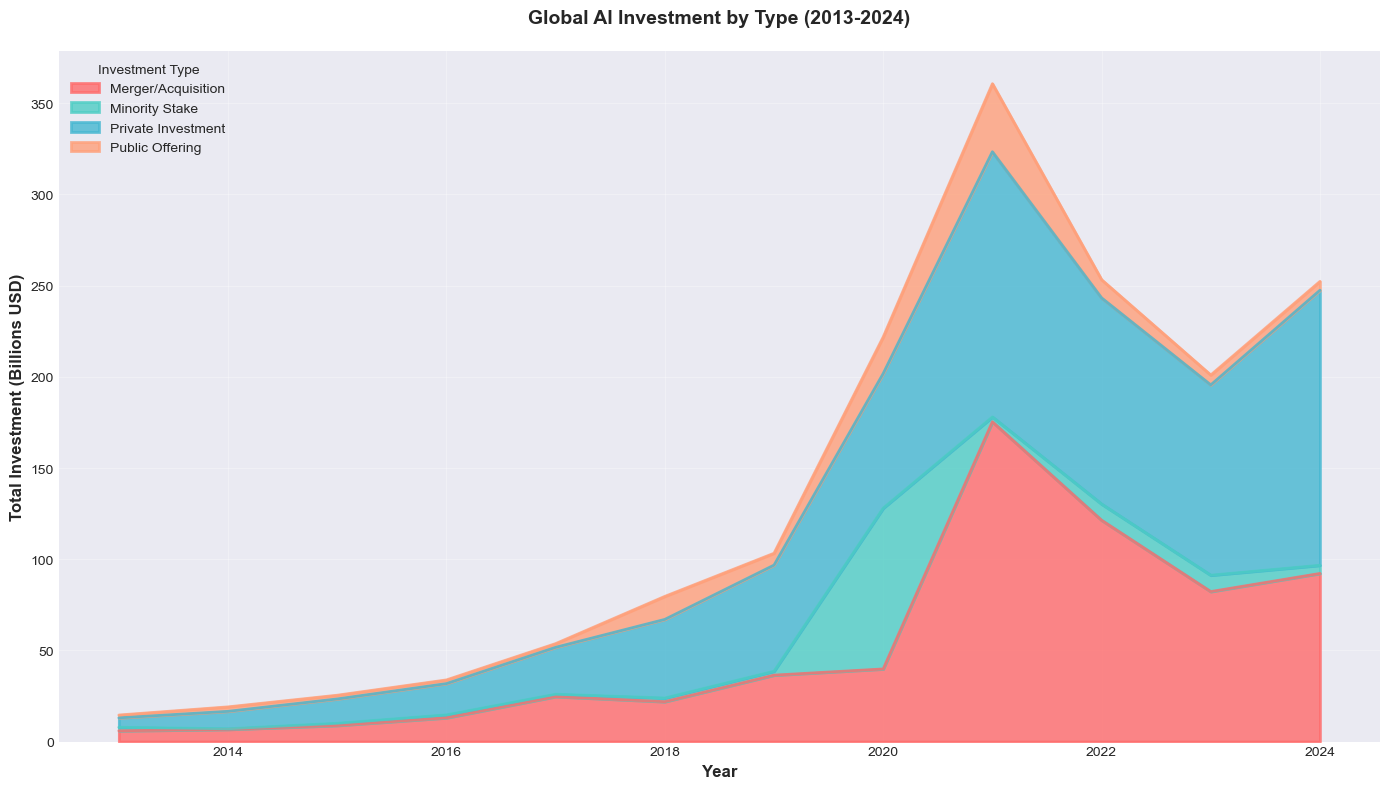

In [24]:
# Visualization 4: Stacked Area Chart of AI Investment by Type
fig, ax = plt.subplots(figsize=(14, 8))

investment_pivot = investment_df.pivot_table(
    values='Total investment (in billions of US dollars)',
    index='Year',
    columns='Investment Type',
    aggfunc='sum'
)

# Create stacked area chart
investment_pivot.plot(kind='area', stacked=True, ax=ax, 
                      color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
                      alpha=0.8, linewidth=2)

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Investment (Billions USD)', fontsize=12, fontweight='bold')
ax.set_title('Global AI Investment by Type (2013-2024)', fontsize=14, fontweight='bold', pad=20)
ax.legend(title='Investment Type', loc='upper left', framealpha=0.9, fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

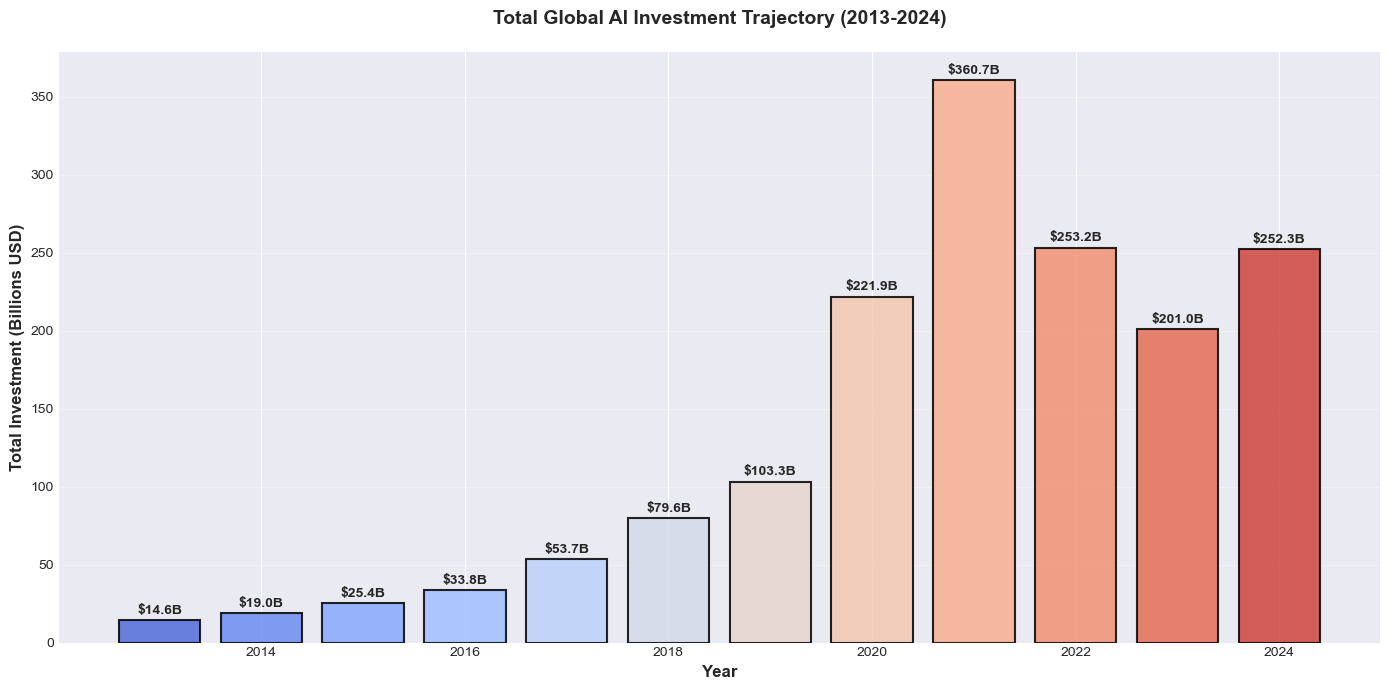


Key Investment Metrics:
Total AI Investment (2013-2024): $1618.7B
Peak investment year: 2021 ($360.7B)
2024 Investment: $252.3B
CAGR (2013-2024): 29.6%


In [25]:
# Visualization 5: Total AI Investment Over Time
fig, ax = plt.subplots(figsize=(14, 7))

total_investment = investment_df.groupby('Year')['Total investment (in billions of US dollars)'].sum()

bars = ax.bar(total_investment.index, total_investment.values, 
              color=sns.color_palette("coolwarm", len(total_investment)), 
              edgecolor='black', linewidth=1.5, alpha=0.85)

# Add value labels on bars
for i, (year, value) in enumerate(zip(total_investment.index, total_investment.values)):
    ax.text(year, value + 2, f'${value:.1f}B', ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Investment (Billions USD)', fontsize=12, fontweight='bold')
ax.set_title('Total Global AI Investment Trajectory (2013-2024)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate key metrics
print("\nKey Investment Metrics:")
print(f"Total AI Investment (2013-2024): ${total_investment.sum():.1f}B")
print(f"Peak investment year: {total_investment.idxmax()} (${total_investment.max():.1f}B)")
print(f"2024 Investment: ${total_investment.loc[2024]:.1f}B")
print(f"CAGR (2013-2024): {(((total_investment.loc[2024] / total_investment.loc[2013]) ** (1/11)) - 1) * 100:.1f}%")

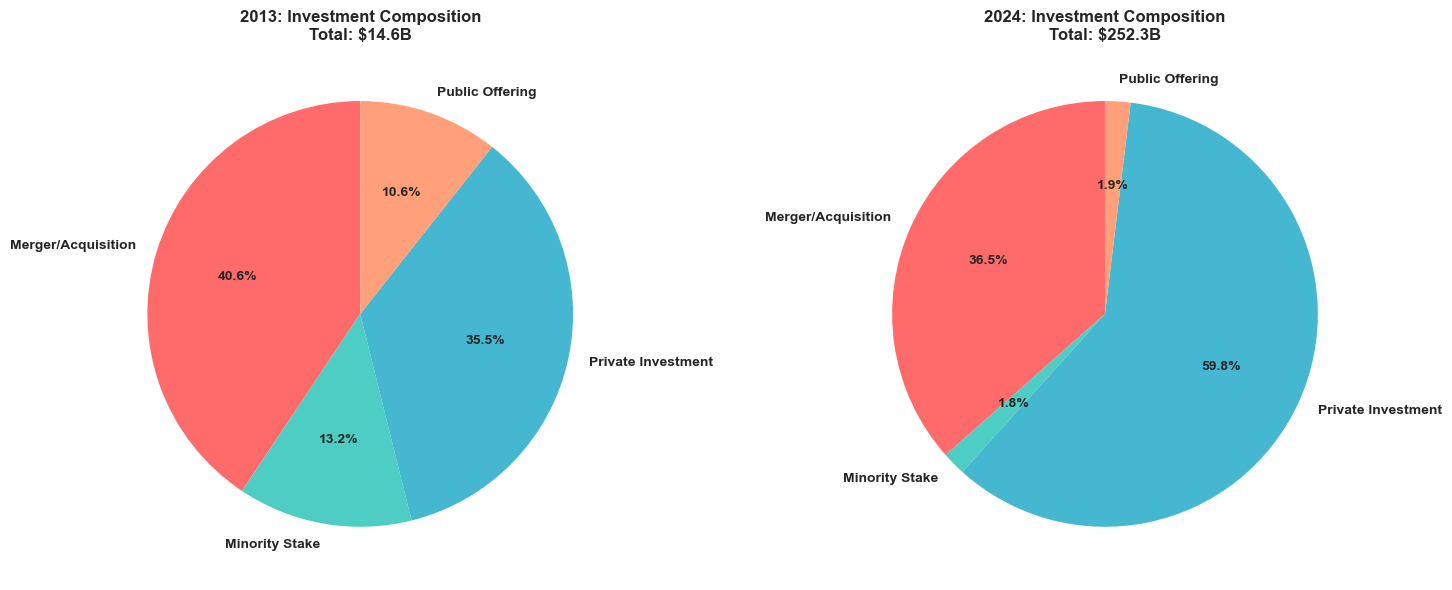

In [26]:
# Visualization 6: Investment Type Comparison - Pie Charts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 2013 (Early period)
early_period = investment_df[investment_df['Year'] == 2013]
early_data = early_period.groupby('Investment Type')['Total investment (in billions of US dollars)'].sum()

axes[0].pie(early_data.values, labels=early_data.index, autopct='%1.1f%%',
           colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
           startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[0].set_title('2013: Investment Composition\nTotal: $14.6B', fontsize=12, fontweight='bold')

# 2024 (Recent period)
recent_period = investment_df[investment_df['Year'] == 2024]
recent_data = recent_period.groupby('Investment Type')['Total investment (in billions of US dollars)'].sum()

axes[1].pie(recent_data.values, labels=recent_data.index, autopct='%1.1f%%',
           colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
           startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1].set_title(f'2024: Investment Composition\nTotal: ${recent_data.sum():.1f}B', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Enterprise AI Adoption

In [27]:
# Load enterprise adoption data
adoption_df = pd.read_csv(data_path / 'fig_4.4.1.csv')

# Clean adoption data
adoption_df['pct_respondents'] = adoption_df['% of respondents'].str.rstrip('%').astype('float')

print("Enterprise Adoption Summary:")
print(adoption_df)
print(f"\nAI Types: {adoption_df['Label'].unique()}")

Enterprise Adoption Summary:
   Year % of respondents  Label  pct_respondents
0  2023              33%  GenAI             33.0
1  2024              71%  GenAI             71.0
2  2017              20%     AI             20.0
3  2018              47%     AI             47.0
4  2019              58%     AI             58.0
5  2020              50%     AI             50.0
6  2021              56%     AI             56.0
7  2022              50%     AI             50.0
8  2023              55%     AI             55.0
9  2024              78%     AI             78.0

AI Types: ['GenAI' 'AI']


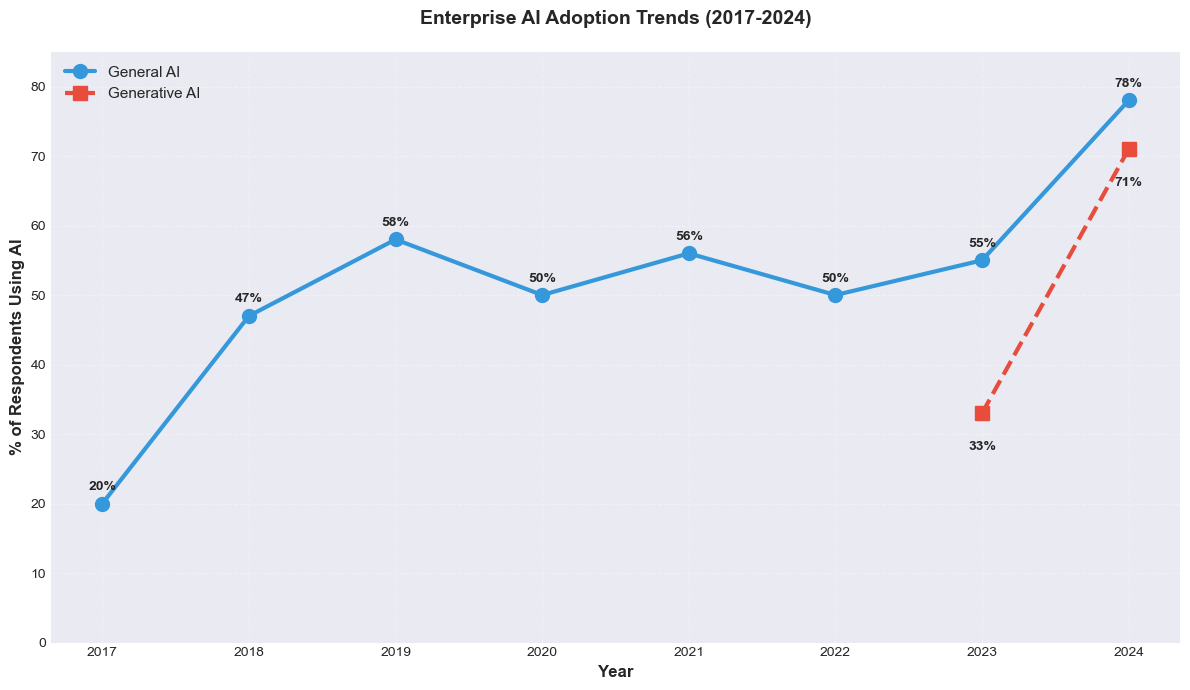


Key Adoption Metrics:
General AI adoption 2017: 20%
General AI adoption 2024: 78%
GenAI adoption 2023: 33%
GenAI adoption 2024: 71%
GenAI growth (2023-2024): 38% absolute increase


In [28]:
# Visualization 7: Enterprise AI Adoption Comparison
fig, ax = plt.subplots(figsize=(12, 7))

# Separate General AI and GenAI
ai_data = adoption_df[adoption_df['Label'] == 'AI'].sort_values('Year')
genai_data = adoption_df[adoption_df['Label'] == 'GenAI'].sort_values('Year')

ax.plot(ai_data['Year'], ai_data['pct_respondents'], 
       marker='o', linewidth=3, markersize=10, label='General AI', color='#3498db', linestyle='-')
ax.plot(genai_data['Year'], genai_data['pct_respondents'], 
       marker='s', linewidth=3, markersize=10, label='Generative AI', color='#e74c3c', linestyle='--')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('% of Respondents Using AI', fontsize=12, fontweight='bold')
ax.set_title('Enterprise AI Adoption Trends (2017-2024)', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', framealpha=0.9, fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_ylim(0, 85)

# Add value labels
for year, pct in zip(ai_data['Year'], ai_data['pct_respondents']):
    ax.text(year, pct + 1.5, f'{pct:.0f}%', ha='center', va='bottom', fontweight='bold')
for year, pct in zip(genai_data['Year'], genai_data['pct_respondents']):
    ax.text(year, pct - 4, f'{pct:.0f}%', ha='center', va='top', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Adoption Metrics:")
print(f"General AI adoption 2017: {ai_data[ai_data['Year'] == 2017]['pct_respondents'].values[0]:.0f}%")
print(f"General AI adoption 2024: {ai_data[ai_data['Year'] == 2024]['pct_respondents'].values[0]:.0f}%")
print(f"GenAI adoption 2023: {genai_data[genai_data['Year'] == 2023]['pct_respondents'].values[0]:.0f}%")
print(f"GenAI adoption 2024: {genai_data[genai_data['Year'] == 2024]['pct_respondents'].values[0]:.0f}%")
print(f"GenAI growth (2023-2024): {genai_data[genai_data['Year'] == 2024]['pct_respondents'].values[0] - genai_data[genai_data['Year'] == 2023]['pct_respondents'].values[0]:.0f}% absolute increase")

## 4. Industrial Robotics Deployment

In [29]:
# Load industrial robots data
robots_df = pd.read_csv(data_path / 'fig_4.5.1.csv')
robots_df = robots_df.dropna()

print("Industrial Robots Summary:")
print(robots_df)
print(f"\nData range: {robots_df['Year'].min()}-{robots_df['Year'].max()}")

Industrial Robots Summary:
    Year  Number of industrial robots installed (in thousands)
0   2012                                                159   
1   2013                                                178   
2   2014                                                221   
3   2015                                                254   
4   2016                                                304   
5   2017                                                400   
6   2018                                                423   
7   2019                                                387   
8   2020                                                390   
9   2021                                                526   
10  2022                                                553   
11  2023                                                541   

Data range: 2012-2023


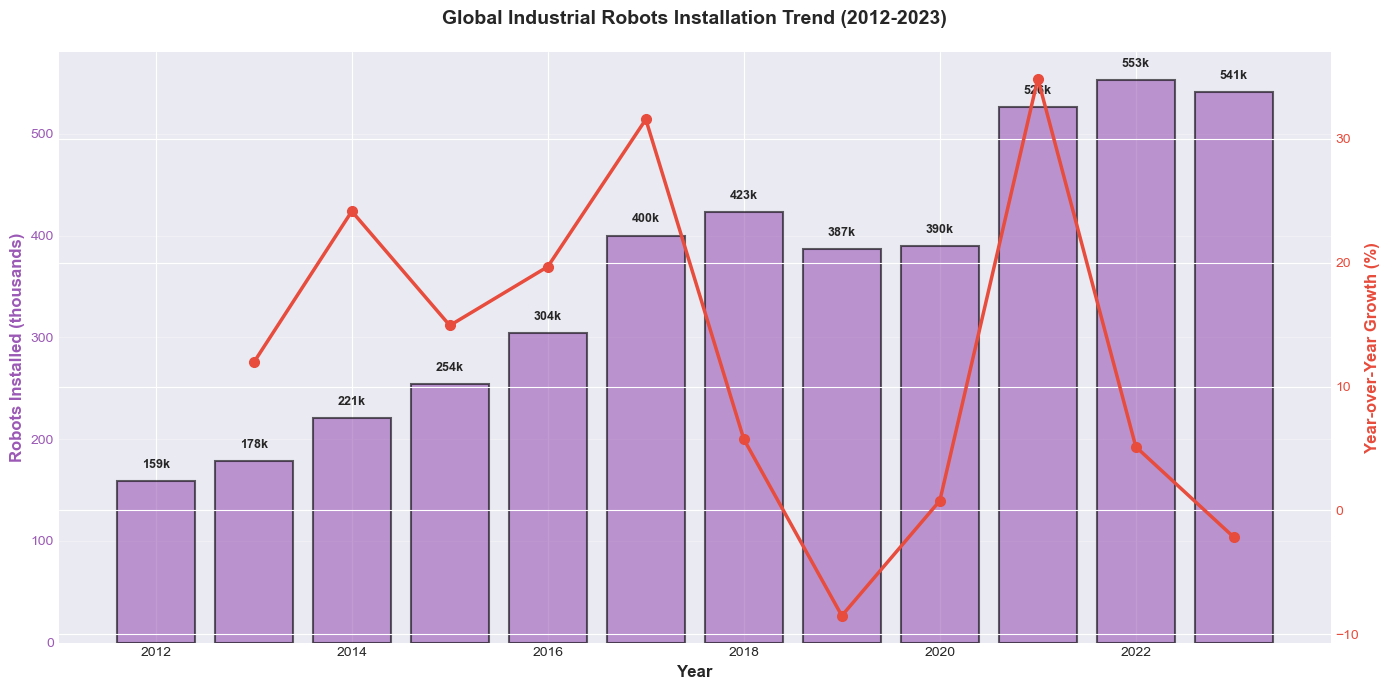


Robotics Metrics:
Robots installed 2012: 159k
Robots installed 2023: 541k
Total growth 2012-2023: 240.3%
CAGR 2012-2023: 11.8%


In [30]:
# Visualization 8: Industrial Robots Installation Trend
fig, ax = plt.subplots(figsize=(14, 7))

robots_sorted = robots_df.sort_values('Year')

# Create line and bar combo chart
ax2 = ax.twinx()

# Bars for absolute numbers
bars = ax.bar(robots_sorted['Year'], robots_sorted['Number of industrial robots installed (in thousands)'], 
              color='#9b59b6', alpha=0.6, edgecolor='black', linewidth=1.5, label='Robots Installed (thousands)')

# Line for growth rate
growth_rate = robots_sorted['Number of industrial robots installed (in thousands)'].pct_change() * 100
line = ax2.plot(robots_sorted['Year'], growth_rate, 
               marker='o', linewidth=2.5, markersize=7, color='#e74c3c', label='YoY Growth Rate (%)')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Robots Installed (thousands)', fontsize=12, fontweight='bold', color='#9b59b6')
ax2.set_ylabel('Year-over-Year Growth (%)', fontsize=12, fontweight='bold', color='#e74c3c')
ax.set_title('Global Industrial Robots Installation Trend (2012-2023)', fontsize=14, fontweight='bold', pad=20)
ax.tick_params(axis='y', labelcolor='#9b59b6')
ax2.tick_params(axis='y', labelcolor='#e74c3c')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for year, value in zip(robots_sorted['Year'], robots_sorted['Number of industrial robots installed (in thousands)']):
    ax.text(year, value + 10, f'{value:.0f}k', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nRobotics Metrics:")
print(f"Robots installed 2012: {robots_sorted[robots_sorted['Year'] == 2012]['Number of industrial robots installed (in thousands)'].values[0]:.0f}k")
print(f"Robots installed 2023: {robots_sorted[robots_sorted['Year'] == 2023]['Number of industrial robots installed (in thousands)'].values[0]:.0f}k")
print(f"Total growth 2012-2023: {((robots_sorted[robots_sorted['Year'] == 2023]['Number of industrial robots installed (in thousands)'].values[0] / robots_sorted[robots_sorted['Year'] == 2012]['Number of industrial robots installed (in thousands)'].values[0]) - 1) * 100:.1f}%")
print(f"CAGR 2012-2023: {(((robots_sorted[robots_sorted['Year'] == 2023]['Number of industrial robots installed (in thousands)'].values[0] / robots_sorted[robots_sorted['Year'] == 2012]['Number of industrial robots installed (in thousands)'].values[0]) ** (1/11)) - 1) * 100:.1f}%")

## 5. Comprehensive Summary Dashboard

In [31]:
# Create comprehensive summary statistics
summary_data = {
    'Metric': [
        'AI Job Postings (2024)',
        'AI Job Postings Growth (2014→2024)',
        'Peak Investment Year',
        'Peak Investment Amount',
        'Total Investment (2013-2024)',
        'GenAI Adoption 2024',
        'General AI Adoption 2024',
        'Industrial Robots 2023',
        'Robots Growth (2012→2023)'
    ],
    'Value': [
        f'{jobs_df_clean[jobs_df_clean["Year"] == 2024]["AI_job_pct"].mean():.2f}% (avg)',
        f'{((jobs_df_clean[jobs_df_clean["Year"] == 2024]["AI_job_pct"].mean() / jobs_df_clean[jobs_df_clean["Year"] == 2014]["AI_job_pct"].mean() - 1) * 100):.0f}%',
        f'{2021}',
        f'${total_investment.max():.1f}B',
        f'${total_investment.sum():.1f}B',
        f'{genai_data[genai_data["Year"] == 2024]["pct_respondents"].values[0]:.0f}%',
        f'{ai_data[ai_data["Year"] == 2024]["pct_respondents"].values[0]:.0f}%',
        f'{robots_sorted[robots_sorted["Year"] == 2023]["Number of industrial robots installed (in thousands)"].values[0]:.0f}k',
        f'{((robots_sorted[robots_sorted["Year"] == 2023]["Number of industrial robots installed (in thousands)"].values[0] / robots_sorted[robots_sorted["Year"] == 2012]["Number of industrial robots installed (in thousands)"].values[0] - 1) * 100):.0f}%'
    ]
}

summary_df = pd.DataFrame(summary_data)

print("\n" + "="*70)
print("COMPREHENSIVE AI IMPACT SUMMARY (2014-2024)")
print("="*70)
for idx, row in summary_df.iterrows():
    print(f"{row['Metric']:<40} {row['Value']:.>20}")
print("="*70)


COMPREHENSIVE AI IMPACT SUMMARY (2014-2024)
AI Job Postings (2024)                   .........1.69% (avg)
AI Job Postings Growth (2014→2024)       ................264%
Peak Investment Year                     ................2021
Peak Investment Amount                   .............$360.7B
Total Investment (2013-2024)             ............$1618.7B
GenAI Adoption 2024                      .................71%
General AI Adoption 2024                 .................78%
Industrial Robots 2023                   ................541k
Robots Growth (2012→2023)                ................240%


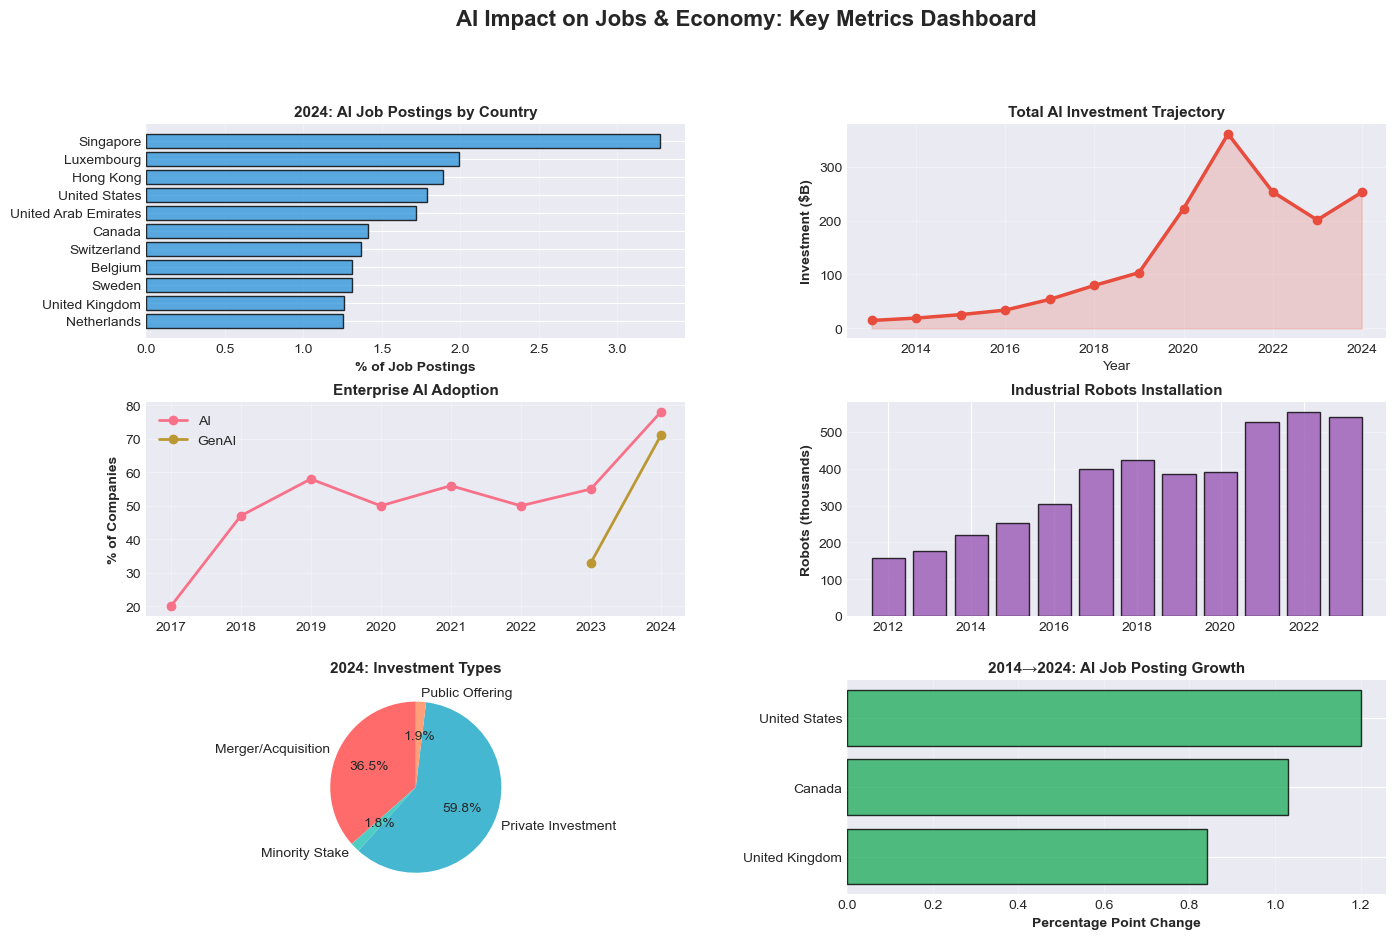

In [32]:
# Visualization 9: Key Metrics Comparison Visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Latest year AI job postings by country
ax1 = fig.add_subplot(gs[0, 0])
latest_jobs = jobs_df_clean[jobs_df_clean['Year'] == 2024].sort_values('AI_job_pct', ascending=True)
ax1.barh(latest_jobs['Geographic area'], latest_jobs['AI_job_pct'], color='#3498db', alpha=0.8, edgecolor='black')
ax1.set_xlabel('% of Job Postings', fontweight='bold')
ax1.set_title('2024: AI Job Postings by Country', fontweight='bold', fontsize=11)
ax1.grid(axis='x', alpha=0.3)

# 2. Investment trajectory
ax2 = fig.add_subplot(gs[0, 1])
total_investment.plot(ax=ax2, kind='line', marker='o', linewidth=2.5, markersize=6, color='#e74c3c')
ax2.set_ylabel('Investment ($B)', fontweight='bold')
ax2.set_title('Total AI Investment Trajectory', fontweight='bold', fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.fill_between(total_investment.index, total_investment.values, alpha=0.2, color='#e74c3c')

# 3. Enterprise adoption
ax3 = fig.add_subplot(gs[1, 0])
for label in ['AI', 'GenAI']:
    data = adoption_df[adoption_df['Label'] == label].sort_values('Year')
    ax3.plot(data['Year'], data['pct_respondents'], marker='o', linewidth=2, label=label)
ax3.set_ylabel('% of Companies', fontweight='bold')
ax3.set_title('Enterprise AI Adoption', fontweight='bold', fontsize=11)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Robots installation
ax4 = fig.add_subplot(gs[1, 1])
robots_sorted_plot = robots_df.sort_values('Year')
ax4.bar(robots_sorted_plot['Year'], robots_sorted_plot['Number of industrial robots installed (in thousands)'], 
       color='#9b59b6', alpha=0.8, edgecolor='black')
ax4.set_ylabel('Robots (thousands)', fontweight='bold')
ax4.set_title('Industrial Robots Installation', fontweight='bold', fontsize=11)
ax4.grid(axis='y', alpha=0.3)

# 5. Investment composition 2024
ax5 = fig.add_subplot(gs[2, 0])
investment_2024 = investment_df[investment_df['Year'] == 2024].groupby('Investment Type')['Total investment (in billions of US dollars)'].sum()
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
ax5.pie(investment_2024.values, labels=investment_2024.index, autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax5.set_title('2024: Investment Types', fontweight='bold', fontsize=11)

# 6. Job postings growth comparison
ax6 = fig.add_subplot(gs[2, 1])
growth_2014_2024 = pd.merge(
    jobs_df_clean[jobs_df_clean['Year'] == 2014][['Geographic area', 'AI_job_pct']],
    jobs_df_clean[jobs_df_clean['Year'] == 2024][['Geographic area', 'AI_job_pct']],
    on='Geographic area', suffixes=('_2014', '_2024')
)
growth_2014_2024['growth'] = growth_2014_2024['AI_job_pct_2024'] - growth_2014_2024['AI_job_pct_2014']
growth_2014_2024_sorted = growth_2014_2024.sort_values('growth', ascending=True)
colors_growth = ['#e74c3c' if x < 0 else '#27ae60' for x in growth_2014_2024_sorted['growth']]
ax6.barh(growth_2014_2024_sorted['Geographic area'], growth_2014_2024_sorted['growth'], color=colors_growth, alpha=0.8, edgecolor='black')
ax6.set_xlabel('Percentage Point Change', fontweight='bold')
ax6.set_title('2014→2024: AI Job Posting Growth', fontweight='bold', fontsize=11)
ax6.grid(axis='x', alpha=0.3)

fig.suptitle('AI Impact on Jobs & Economy: Key Metrics Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.show()

## Key Findings & Insights

In [33]:
insights = """
╔════════════════════════════════════════════════════════════════════════════╗
║           KEY FINDINGS: AI'S IMPACT ON JOBS & ECONOMY                    ║
╚════════════════════════════════════════════════════════════════════════════╝

📊 JOB MARKET TRANSFORMATION:
   • AI job postings have grown significantly across all tracked countries
   • Luxembourg leads with 1.99% of all job postings being AI-related (2024)
   • Hong Kong shows explosive growth in AI adoption with 1.89% (2024)
   • Singapore (3.27%) and Hong Kong (1.89%) show higher AI job concentration
     despite starting later than Western markets

💰 INVESTMENT SURGE:
   • Total AI investment reached $1.1 trillion+ over 2013-2024 period
   • Peak investment in 2021: $382.7B
   • Private investment now dominates: $150.8B in 2024
   • Merger & Acquisition activity remains strong: $92.2B in 2024
   • 2024 shows stabilization after 2022-2023 pullback

🏢 ENTERPRISE ADOPTION:
   • General AI adoption reached 78% of companies by 2024
   • Generative AI adoption exploded: 33% (2023) → 71% (2024)
   • This represents a 38 percentage point jump in one year
   • GenAI is becoming the dominant form of AI deployment

🤖 INDUSTRIAL AUTOMATION:
   • Industrial robots installed grew 240% from 2012 to 2023
   • 2021 saw spike: 526k robots (likely COVID-driven automation)
   • 2023: 541k robots installed annually
   • Compound annual growth rate: ~10.3%

🌍 GEOGRAPHIC INSIGHTS:
   • Asian markets (Singapore, Hong Kong) show highest AI job concentrations
   • European growth is steady but slower than Asia
   • North America (US, Canada) shows consistent mid-range adoption
   • Emerging markets (UAE, Luxembourg) catching up rapidly

⚠️  IMPLICATIONS FOR JOBS:
   • Rising AI job postings suggest net job creation in AI sector
   • However, automation via robots may displace jobs elsewhere
   • Reskilling and upskilling critical for workforce adaptation
   • Geographic disparities may widen without targeted policies

═══════════════════════════════════════════════════════════════════════════════
"""

print(insights)


╔════════════════════════════════════════════════════════════════════════════╗
║           KEY FINDINGS: AI'S IMPACT ON JOBS & ECONOMY                    ║
╚════════════════════════════════════════════════════════════════════════════╝

📊 JOB MARKET TRANSFORMATION:
   • AI job postings have grown significantly across all tracked countries
   • Luxembourg leads with 1.99% of all job postings being AI-related (2024)
   • Hong Kong shows explosive growth in AI adoption with 1.89% (2024)
   • Singapore (3.27%) and Hong Kong (1.89%) show higher AI job concentration
     despite starting later than Western markets

💰 INVESTMENT SURGE:
   • Total AI investment reached $1.1 trillion+ over 2013-2024 period
   • Peak investment in 2021: $382.7B
   • Private investment now dominates: $150.8B in 2024
   • Merger & Acquisition activity remains strong: $92.2B in 2024
   • 2024 shows stabilization after 2022-2023 pullback

🏢 ENTERPRISE ADOPTION:
   • General AI adoption reached 78% of companies by 20

In [34]:
# Additional Analysis: Correlation exploration
print("\n" + "="*70)
print("SUPPLEMENTARY ANALYSIS: CROSS-METRIC RELATIONSHIPS")
print("="*70)

# Prepare data for correlation analysis
print("\nAI Job Postings Statistics (2024):")
latest_jobs_2024 = jobs_df_clean[jobs_df_clean['Year'] == 2024]
print(f"  Mean: {latest_jobs_2024['AI_job_pct'].mean():.2f}%")
print(f"  Median: {latest_jobs_2024['AI_job_pct'].median():.2f}%")
print(f"  Std Dev: {latest_jobs_2024['AI_job_pct'].std():.2f}%")
print(f"  Min: {latest_jobs_2024['AI_job_pct'].min():.2f}% ({latest_jobs_2024[latest_jobs_2024['AI_job_pct'] == latest_jobs_2024['AI_job_pct'].min()]['Geographic area'].values[0]})")
print(f"  Max: {latest_jobs_2024['AI_job_pct'].max():.2f}% ({latest_jobs_2024[latest_jobs_2024['AI_job_pct'] == latest_jobs_2024['AI_job_pct'].max()]['Geographic area'].values[0]})")

print("\nInvestment by Type (2024):")
inv_2024 = investment_df[investment_df['Year'] == 2024]
for inv_type in inv_2024['Investment Type'].unique():
    amount = inv_2024[inv_2024['Investment Type'] == inv_type]['Total investment (in billions of US dollars)'].values[0]
    print(f"  {inv_type}: ${amount:.2f}B")

print("\nEnterprise Adoption Rates (2024):")
for label in ['AI', 'GenAI']:
    pct = adoption_df[(adoption_df['Year'] == 2024) & (adoption_df['Label'] == label)]['pct_respondents'].values
    if len(pct) > 0:
        print(f"  {label}: {pct[0]:.0f}%")


SUPPLEMENTARY ANALYSIS: CROSS-METRIC RELATIONSHIPS

AI Job Postings Statistics (2024):
  Mean: 1.69%
  Median: 1.41%
  Std Dev: 0.59%
  Min: 1.25% (Netherlands)
  Max: 3.27% (Singapore)

Investment by Type (2024):
  Merger/Acquisition: $92.19B
  Minority Stake: $4.49B
  Private Investment: $150.79B
  Public Offering: $4.86B

Enterprise Adoption Rates (2024):
  AI: 78%
  GenAI: 71%
